# Simulation of Prices of Coupon-Bearing bonds using CIR

In [68]:
import numpy as np
import pandas as pd
import edhec_risk_kit as erk
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [69]:
erk.bonds_price(5,100,.05, 12, .03)

0    109.275393
dtype: float64

In [70]:
rates, zc_prices = erk.cir(10,500,b=0.03, r_0=0.03)

In [71]:
erk.bonds_price(5,100,.05, 12, rates.iloc[0][[1,2,3]])

1    109.275393
2    109.275393
3    109.275393
dtype: float64

In [72]:
erk.bonds_price(5,100,.05, 12, rates.iloc[1][[1,2,3]])

1    109.517882
2    110.833246
3    109.674312
dtype: float64

In [73]:
rates[[1,2,3]].head()
rates[[1,2,3]]

,1,2,3
0,0.030000,0.030000,0.030000
1,0.029502,0.026824,0.029182
2,0.028505,0.030032,0.028269
3,0.029312,0.034352,0.028004
4,0.031780,0.030875,0.028923
...,...,...,...
116,0.081164,0.016342,0.034868
117,0.079588,0.016840,0.035369
118,0.073784,0.017410,0.035346
119,0.075853,0.016338,0.031233


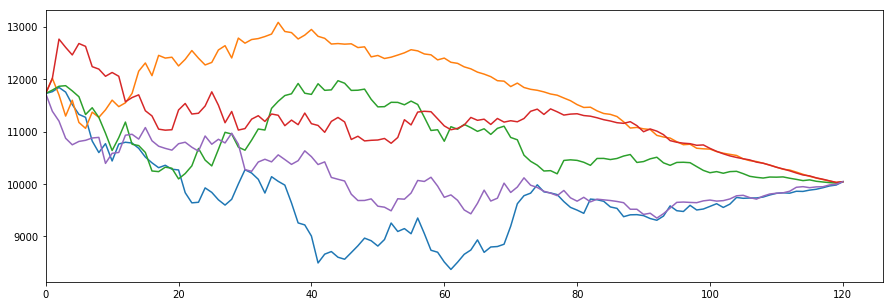

In [74]:
erk.bonds_price(10,10000,.05, 12, rates[[1,2,3,4,5]]).plot(legend=False, figsize=(15,5), xlim = 0)

In [75]:
prices = erk.bonds_price(10,100,.05, 12, rates[[1,2,3,4,5]])
prices

,1,2,3,4,5
0,117.26,117.26,117.26,117.26,117.26
1,117.605,120.16,117.907,120.129,113.868
2,118.414,116.983,118.637,127.635,111.988
3,117.526,112.949,118.749,126.062,108.712
4,115.147,115.966,117.755,124.621,107.464
...,...,...,...,...,...
116,98.9785,101.118,100.501,101.153,99.4304
117,99.27,100.827,100.364,100.892,99.4596
118,99.6072,100.542,100.243,100.582,99.8044
119,99.7859,100.28,100.156,100.282,99.9183


In [76]:
br = prices.pct_change().dropna()
erk.annualize_rets(br, 12)
# this one is wrong are only counting the price return of the bonds not the total return

1   -0.015387
2   -0.015387
3   -0.015387
4   -0.015387
5   -0.015387
dtype: float64

In [77]:
p = erk.bonds_price(10,100,.05,12,rates[[1,2,3]])
btr = erk.bond_total_return(p,100,.05,12)
erk.annualize_rets(btr, 12)

1    0.037009
2    0.027740
3    0.031274
dtype: float64

## A cross asset ptf

In [78]:
price_10 = erk.bonds_price(10, 100, .05, 12, rates)
price_10[[1,2,3]].tail()

,1,2,3
116,98.9785,101.118,100.501
117,99.27,100.827,100.364
118,99.6072,100.542,100.243
119,99.7859,100.28,100.156
120,100.417,100.417,100.417


In [79]:
price_30 = erk.bonds_price(30, 100, .05, 12, rates)
price_30[[1,2,3]].tail()

,1,2,3
116,69.0164,158.196,122.018
117,70.2818,156.863,121.135
118,75.0779,155.391,121.112
119,73.3816,157.6,127.972
120,69.2699,159.593,124.549


In [80]:
price_30[[1,2,3]].head()

,1,2,3
0,139.532,139.532,139.532
1,140.704,147.64,141.51
2,143.159,139.316,143.765
3,141.037,129.133,144.37
4,134.971,137.128,141.943


In [82]:
rets_30 = erk.bond_total_return(price_30, 100, .05, 12)
rets_10 = erk.bond_total_return(price_10, 100, .05, 12)
rets_bonds = .6*rets_10 + .4*rets_30 # assumption of rebalancing to a 60/40 mix of portfolio everythinh end of month

In [83]:
# creating a composite by taking the mean of the 500 example
mean_rets_bonds= rets_bonds.mean(axis='columns')
erk.summary_stats(pd.DataFrame(mean_rets_bonds))

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
0,0.035828,0.003525,0.048495,3.852238,-0.001303,-0.000763,1.609016,-0.000077


In [88]:
# prices of equity
price_eq = erk.gbm(n_years=10, n_scenarios=500, mu=0.07, sigma=0.15)
price_eq.shape

(121, 500)

In [89]:
rets_eq = price_eq.pct_change().dropna()
rets_eq.shape

(120, 500)

In [90]:
rets_bonds.shape

(120, 500)

In [92]:
# stocks and bonds mix
rets = .7*rets_eq + .3*rets_bonds
rets_mean = rets.mean(axis='columns')
erk.summary_stats(pd.DataFrame(rets_mean))

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
0,0.060132,0.004642,0.200806,3.740861,-0.002781,-0.002154,6.317977,0.0
